In [25]:
!pip install gensim
!pip install testfixtures
!pip install tqdm

In [26]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from gensim.models import Doc2Vec
from gensim.test.utils import get_tmpfile
import os
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import gensim
from numpy import dot, absolute
from numpy.linalg import norm
from gensim.models import Word2Vec
from tqdm import tqdm

In [3]:
ex = pd.read_csv('../../../models_storage/word_embeddings_data/ocr_text_with_tags_10000_2020_sept5.csv')

In [4]:
ex.head()

Unnamed: 0                                           filename  \
0           0  ../../../jstor_data/ocr/journal-article-10.230...   
1           1  ../../../jstor_data/ocr/journal-article-10.230...   
2           2  ../../../jstor_data/ocr/journal-article-10.230...   
3           3  ../../../jstor_data/ocr/journal-article-10.230...   
4           4  ../../../jstor_data/ocr/journal-article-10.230...   

                                                text   edited_filename  
0  research note church membership netherlands ro...   10.2307_1387034  
1  polish i3o oo sociological review issn communi...  10.2307_41274754  
2  article jjdlbsj grapliy compassionate egalitar...  10.2307_24467156  
3  reply allison more comparing regression coeffi...   10.2307_2782279  
4  determinants spousal interaction marital struc...    10.2307_351656

In [5]:
for i in ex.index:
    try:
        str.split(ex[ex.edited_filename == str(ex.iloc[i,].edited_filename)].text.item())
    except:
        print('cant   ', i)

cant    47416


In [10]:
model_word2vec = gensim.models.KeyedVectors.load("../../../models_storage/word_embeddings_data/word2vec_phrased_filtered_300d_aug14.bin") #change if model updated

In [11]:
cwd = os.getcwd()
cwd = cwd.replace("Computational-Analysis-For-Social-Science/WordEmbedding/other_scripts", 
                  "models_storage/word_embeddings_data/")
fname_dmm = get_tmpfile("models_storage/word_embeddings_data/dmm_model_phrased_filtered_sept2")

In [6]:
model_dmm = Doc2Vec.load(fname_dmm)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/models_storage/word_embeddings_data/dmm_model_phrased_filtered_sept2'

# Cosine scores data loading

In [12]:
text = pd.read_csv("../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_2020_oct27.csv") 

In [13]:
text['article_id'] = text.filename.apply(lambda x: x[24:-4])

In [14]:
text.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                            filename  \
0  ../../../jstor_data/ocr/journal-article-10.230...   
1  ../../../jstor_data/ocr/journal-article-10.230...   
2  ../../../jstor_data/ocr/journal-article-10.230...   
3  ../../../jstor_data/ocr/journal-article-10.230...   
4  ../../../jstor_data/ocr/journal-article-10.230...   

                                                text   edited_filename  \
0  research note church membership netherlands ro...   10.2307_1387034   
1  polish i3o oo sociological review issn communi...  10.2307_41274754   
2  article jjdlbsj grapliy compassionate egalitar...  10.2307_24467156   
3  reply allison more comparing regression coeffi...   10.2307_2782279   
4  determinants spousal interaction marital struc...    10.2307_351656   

   relational_word2vec_cosine  demographic_word2vec_cosine  \
0                    0.515229                     0.519208   
1                    0.634882                     0.608059   
2                    0.592177                     0.550681   
3                    0.504772                     0.517018   
4                    0.600043                     0.539921   

   culture_word2vec_cosine                        article_id  
0                 0.507997   journal-article-10.2307_1387034  
1                 0.695339  journal-article-10.2307_41274754  
2                 0.679812  journal-article-10.2307_24467156  
3                 0.437914   journal-article-10.2307_2782279  
4                 0.568204    journal-article-10.2307_351656

In [15]:
text_2 = pd.read_csv('../../../models_storage/word_embeddings_data/counts_and_subject.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
import pandas as pd
test = pd.read_csv('../../../models_storage/word_embeddings_data/filtered_index.csv')

In [17]:
test.head()

journal-article-10.2307_2065002
0   journal-article-10.2307_3380821
1   journal-article-10.2307_2095822
2   journal-article-10.2307_2631839
3  journal-article-10.2307_40836133
4   journal-article-10.2307_2579666

In [18]:
text_2.year.unique()

array(['1978', '1986', '1983', '1985', '2005', '1990', '1977', '2009',
       '2000', '2013', '1996', '2012', '2011', '1995', '1987', '1991',
       '2006', '2007', '1979', '1993', '1999', '1980', '1981', '1976',
       '2008', '1972', '1971', '1974', '1994', '1988', '2002', '1982',
       '2001', '1975', '2004', '2010', '1998', '1989', '1973', '1997',
       '1992', '2014', '2003', '2015', '1984', '2002b', '1999b', '2000b',
       '2012b', '1987g', '2004b', '2003b', '1996b', '2008b', 1996, 1984,
       1999, 2012, 2003, 1977, 1974, 2005, 2010, 1980, 1972, 1986, 2014,
       1985, 1994, 1981, 2004, 1971, 1991, 2011, 2000, 1989, 2008, 2001,
       1983, 1976, 1978, 1973, 2015, 1990, 1975, 2006, 2009, 1998, 1992,
       1995, 1979, 1993, 1982, 2002, 1987, 2013, 2007, 1988, 1997],
      dtype=object)

In [19]:
text = text.merge(text_2, how = 'inner', on = 'article_id')

In [20]:
text.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                            filename  \
0  ../../../jstor_data/ocr/journal-article-10.230...   
1  ../../../jstor_data/ocr/journal-article-10.230...   
2  ../../../jstor_data/ocr/journal-article-10.230...   
3  ../../../jstor_data/ocr/journal-article-10.230...   
4  ../../../jstor_data/ocr/journal-article-10.230...   

                                                text   edited_filename  \
0  research note church membership netherlands ro...   10.2307_1387034   
1  polish i3o oo sociological review issn communi...  10.2307_41274754   
2  article jjdlbsj grapliy compassionate egalitar...  10.2307_24467156   
3  reply allison more comparing regression coeffi...   10.2307_2782279   
4  determinants spousal interaction marital struc...    10.2307_351656   

   relational_word2vec_cosine  demographic_word2vec_cosine  \
0                    0.515229                     0.519208   
1                    0.634882                     0.608059   
2                    0.592177                     0.550681   
3                    0.504772                     0.517018   
4                    0.600043                     0.539921   

   culture_word2vec_cosine                        article_id  \
0                 0.507997   journal-article-10.2307_1387034   
1                 0.695339  journal-article-10.2307_41274754   
2                 0.679812  journal-article-10.2307_24467156   
3                 0.437914   journal-article-10.2307_2782279   
4                 0.568204    journal-article-10.2307_351656   

   culture_ngram_count  ...  relational_ngram_count  relational_ngram_count.1  \
0                    1  ...                       1                         0   
1                    0  ...                       5                         2   
2                    9  ...                      46                        21   
3                   25  ...                       0                         0   
4                   26  ...                      14                         6   

   demographic_ngram_count  demographic_ngram_count.1  word_count  \
0                        1                          1        1361   
1                        1                          1        1238   
2                        5                          4        7959   
3                        7                          7        1979   
4                       10                          5        4340   

   cultural_author_count  demographic_author_count  relational_author_count  \
0                      0                         0                        0   
1                      0                         0                        0   
2                      0                         0                        0   
3                      0                         0                        0   
4                      0                         0                        0   

   primary_subject  year  
0        Sociology  1988  
1        Sociology  2000  
2        Sociology  2014  
3        Sociology  1995  
4        Sociology  1983  

[5 rows x 21 columns]

In [21]:
text['culture_ngram_count_new'] = text['culture_ngram_count']/text['word_count']
text['demographic_ngram_count_new'] = text['demographic_ngram_count']/text['word_count']
text['relational_ngram_count_new'] = text['relational_ngram_count']/text['word_count']

text['culture_ngram_count_new'] = (text['culture_ngram_count_new'] - text['culture_ngram_count_new'].min())/(text['culture_ngram_count_new'].max() - text['culture_ngram_count_new'].min())
text['demographic_ngram_count_new'] = (text['demographic_ngram_count_new'] - text['demographic_ngram_count_new'].min())/(text['demographic_ngram_count_new'].max() - text['demographic_ngram_count_new'].min())
text['relational_ngram_count_new'] = (text['relational_ngram_count_new']  - 
                                      text['relational_ngram_count_new'] .min())/(text['relational_ngram_count_new'] .max() - text['relational_ngram_count_new'] .min())

In [22]:
text_soc = text[text.primary_subject == 'Sociology']
text_management = text[text.primary_subject != 'Sociology']

In [23]:
text_soc.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                            filename  \
0  ../../../jstor_data/ocr/journal-article-10.230...   
1  ../../../jstor_data/ocr/journal-article-10.230...   
2  ../../../jstor_data/ocr/journal-article-10.230...   
3  ../../../jstor_data/ocr/journal-article-10.230...   
4  ../../../jstor_data/ocr/journal-article-10.230...   

                                                text   edited_filename  \
0  research note church membership netherlands ro...   10.2307_1387034   
1  polish i3o oo sociological review issn communi...  10.2307_41274754   
2  article jjdlbsj grapliy compassionate egalitar...  10.2307_24467156   
3  reply allison more comparing regression coeffi...   10.2307_2782279   
4  determinants spousal interaction marital struc...    10.2307_351656   

   relational_word2vec_cosine  demographic_word2vec_cosine  \
0                    0.515229                     0.519208   
1                    0.634882                     0.608059   
2                    0.592177                     0.550681   
3                    0.504772                     0.517018   
4                    0.600043                     0.539921   

   culture_word2vec_cosine                        article_id  \
0                 0.507997   journal-article-10.2307_1387034   
1                 0.695339  journal-article-10.2307_41274754   
2                 0.679812  journal-article-10.2307_24467156   
3                 0.437914   journal-article-10.2307_2782279   
4                 0.568204    journal-article-10.2307_351656   

   culture_ngram_count  ...  demographic_ngram_count.1  word_count  \
0                    1  ...                          1        1361   
1                    0  ...                          1        1238   
2                    9  ...                          4        7959   
3                   25  ...                          7        1979   
4                   26  ...                          5        4340   

   cultural_author_count  demographic_author_count  relational_author_count  \
0                      0                         0                        0   
1                      0                         0                        0   
2                      0                         0                        0   
3                      0                         0                        0   
4                      0                         0                        0   

   primary_subject  year  culture_ngram_count_new  \
0        Sociology  1988                 0.006796   
1        Sociology  2000                 0.000000   
2        Sociology  2014                 0.010460   
3        Sociology  1995                 0.116852   
4        Sociology  1983                 0.055415   

   demographic_ngram_count_new relational_ngram_count_new  
0                     0.009552                   0.007073  
1                     0.010501                   0.038879  
2                     0.008167                   0.055637  
3                     0.045983                   0.000000  
4                     0.029954                   0.031053  

[5 rows x 24 columns]

In [24]:
df_emb = pd.DataFrame()

ls_emb = []
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['culture_word2vec'] = ls_emb

In [25]:
ls_emb = []
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['demographic_word2vec'] = ls_emb

In [26]:
ls_emb = []
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['relational_word2vec'] = ls_emb

In [27]:
ls_emb = []
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['culture_count'] = ls_emb

In [28]:
ls_emb = []
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['demographic_count'] = ls_emb

In [29]:
ls_emb = []
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['relational_count'] = ls_emb

In [30]:
df_emb.index = ['culture_word2vec', 'demographic_word2vec', 'relational_word2vec', 'culture_count', 
                'demographic_count', 'relational_count']

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

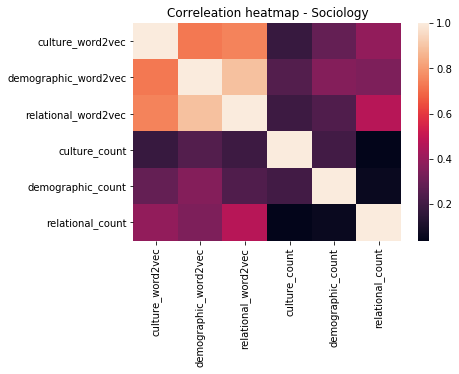

In [42]:
ax = sns.heatmap(df_emb)
ax.set_title('Correleation heatmap - Sociology')

fig.set_size_inches(8,20)
title = "cosine_btw_dicts_36v100_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 8), bbox_inches="tight")
plt.show()

In [33]:
df_emb = pd.DataFrame()

ls_emb = []
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['culture_word2vec'] = ls_emb

In [34]:
ls_emb = []
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['demographic_word2vec'] = ls_emb

In [35]:
ls_emb = []
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['relational_word2vec'] = ls_emb

In [36]:
ls_emb = []
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['culture_count'] = ls_emb

In [37]:
ls_emb = []
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['demographic_count'] = ls_emb

In [38]:
ls_emb = []
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['relational_count'] = ls_emb

In [39]:
df_emb.index = ['culture_word2vec', 'demographic_word2vec', 'relational_word2vec', 'culture_count', 
                'demographic_count', 'relational_count']

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

<Figure size 432x288 with 0 Axes>

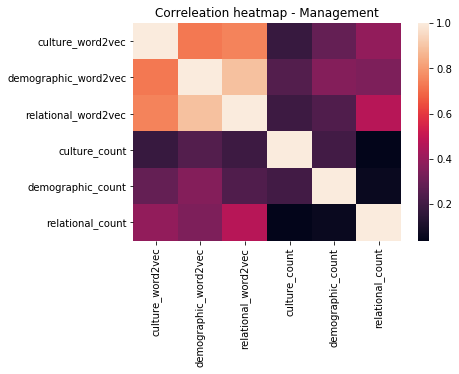

In [43]:
ax = sns.heatmap(df_emb)
ax.set_title('Correleation heatmap - Management')

fig.set_size_inches(8,8)
title = "cosine_btw_dicts_36v100_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 8), bbox_inches="tight")
plt.show()

# Plotting

In [6]:
#change this if you have more dictionary sizes
ls_lens = [5, 10, 100, 5, 10, 100, 5, 10, 100, 5, 10, 100]
ls_avgs = [text.culture.mean(), text.culture.mean(), 
           text.culture.mean(),
            text.culture_doc2vec_cosine.mean(), text.culture_doc2vec_cosine.mean(), 
           text.culture_doc2vec_cosine.mean(), 
           text.culture_word2vec_cosine.mean(), text.culture_word2vec_cosine.mean(), 
           text.culture_word2vec_cosine.mean(),
          text.culture_glove_cosine.mean(), text.culture_glove_cosine.mean(),
          text.culture_glove_cosine.mean()] #Put three same things because we only have one dictionary size rn
                                               #change later when dictionary sizes are provided and created

In [52]:
# ls_avgs = ls_avgs + [df_nn.inqseed_raw.mean(), df_nn.inq30_raw.mean(), df_nn.inq100_raw.mean(),
#                     df_nn.inq500_raw.mean()]
# ls_lens = ls_lens + [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]

In [53]:
# ls_lens

[5, 13, 27, 123, 5, 13, 27, 123]

In [7]:
d = {'Strength': ls_avgs, 'Words':ls_lens, 'Model':['InferSent', 'InferSent', 'InferSent',
                                                    'Doc2Vec','Doc2Vec','Doc2Vec', 
                                                    'Word2Vec', 'Word2Vec', 'Word2Vec',
                                                    'GloVe', 'GloVe', 'GloVe'
                                                     ]}
dat = pd.DataFrame(data=d)
x1 = list(range(3)) #change this if you have more dictionary sizes
squad = ['5','10','100'] #arbitrary values for demonstration purpose only atm.

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

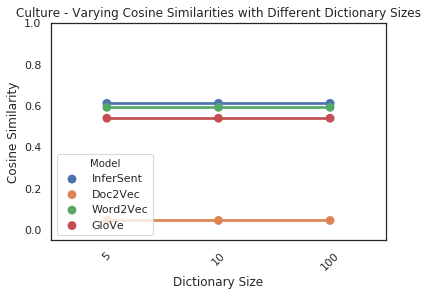

In [10]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", data=dat, hue='Model')
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.05,1)
ax.set(xlabel='Dictionary Size', ylabel='Cosine Similarity')
plt.title("Culture - Varying Cosine Similarities with Different Dictionary Sizes")
plt.show()

### Raw Count Plot

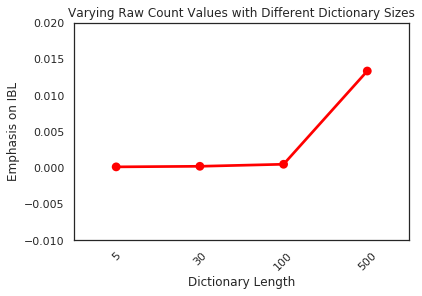

In [63]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='red', data=dat[dat.Metric == 'Raw Count'])
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.01,0.02)
ax.set(xlabel='Dictionary Length', ylabel='Emphasis on IBL')
plt.title("Varying Raw Count Values with Different Dictionary Sizes")
plt.show()

## Histogram plot of the cosine scores for seed, 30, 100, 500 terms.
### Using specific range and bin numbers in order to be able to make better graphical comparison.
#### if we want the line-of-distribution-fit off, do kde=False.

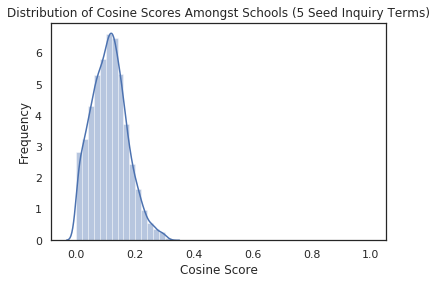

In [126]:
sns.set_style("white")
sns.distplot(df_nn.inqseed_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (5 Seed Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

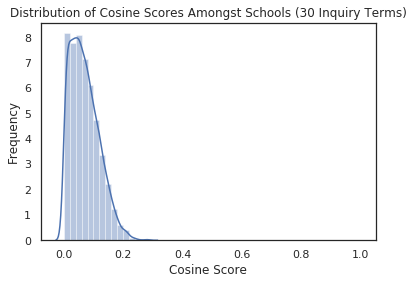

In [127]:
sns.set_style("white")
sns.distplot(df_nn.inq30_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (30 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

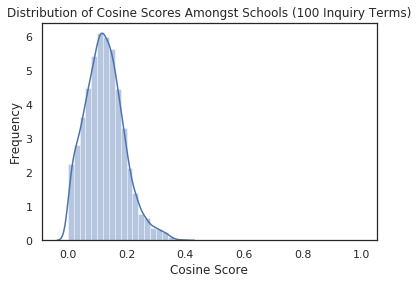

In [128]:
sns.set_style("white")
sns.distplot(df_nn.inq100_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (100 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

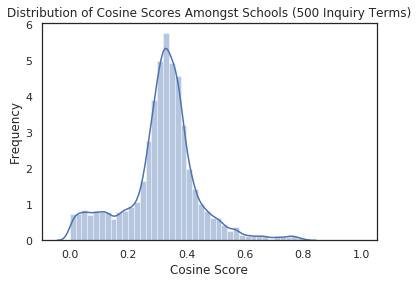

In [129]:
sns.set_style("white")
sns.distplot(df_nn.inq500_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (500 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

## Histogram plot for raw counts

### Initial 4 plots: with the whole df_nn dataframe, which contains many zeros

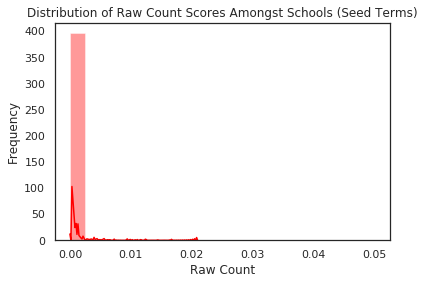

In [68]:
sns.set_style("white")
sns.distplot(df_nn.inqseed_raw, kde=True, bins=20, hist_kws={'range':(0,0.05)}, color='red')
plt.title("Distribution of Raw Count Scores Amongst Schools (Seed Terms)")
plt.xlabel("Raw Count")
plt.ylabel("Frequency")
plt.show()

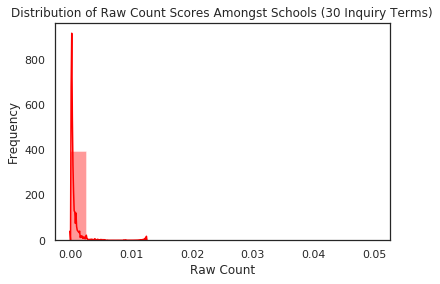

In [69]:
sns.set_style("white")
sns.distplot(df_nn.inq30_raw, kde=True, bins=20, hist_kws={'range':(0,0.05)}, color='red')
plt.title("Distribution of Raw Count Scores Amongst Schools (30 Inquiry Terms)")
plt.xlabel("Raw Count")
plt.ylabel("Frequency")
plt.show()

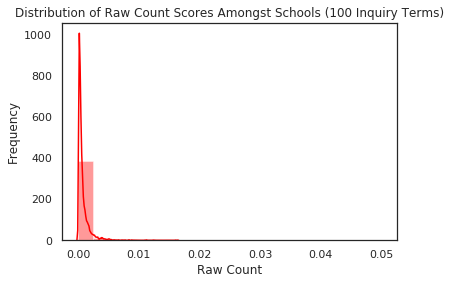

In [70]:
sns.set_style("white")
sns.distplot(df_nn.inq100_raw, kde=True, bins=20, hist_kws={'range':(0,0.05)}, color='red')
plt.title("Distribution of Raw Count Scores Amongst Schools (100 Inquiry Terms)")
plt.xlabel("Raw Count")
plt.ylabel("Frequency")
plt.show()

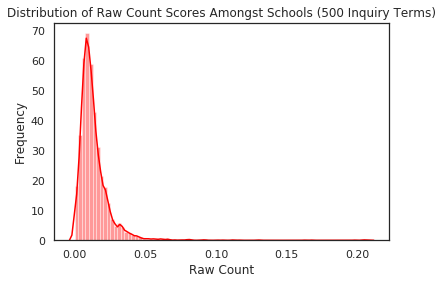

In [71]:
sns.set_style("white")
sns.distplot(df_nn.inq500_raw, kde=True, bins=20, hist_kws={'range':(0,0.05)}, color='red')
plt.title("Distribution of Raw Count Scores Amongst Schools (500 Inquiry Terms)")
plt.xlabel("Raw Count")
plt.ylabel("Frequency")
plt.show()

# Cosine plots with values obtained from InferSent

In [72]:
df_infersent.head()

NCESSCH                                          text_full  \
0  1.001970e+10  reading buddy the reading buddy program design...   
1  2.001500e+10  select school select school ketchikan high sch...   
2  2.001500e+10  l enrollment homeschool title ix assuring gend...   
3  2.001800e+10  select school select school abbott loop elemen...   
4  2.001800e+10  eer info wcc wpg browse home wpg wpg welcome w...   

                                   text_full_limited  \
0  reading buddy the reading buddy program design...   
1  select school select school ketchikan high sch...   
2  l enrollment homeschool title ix assuring gend...   
3  select school select school abbott loop elemen...   
4  eer info wcc wpg browse home wpg wpg welcome w...   

   infersent_inqseed_cosine  infersent_inq30_cosine  infersent_inq100_cosine  \
0                  0.244569                0.155203                 0.546823   
1                  0.283642                0.193733                 0.567076   
2                  0.238978                0.151985                 0.539373   
3                  0.245435                0.160526                 0.541952   
4                  0.273282                0.182033                 0.562822   

   infersent_inq500_cosine  
0                 0.641224  
1                 0.655399  
2                 0.631230  
3                 0.632145  
4                 0.654254

In [73]:
#change this if you have more dictionary sizes
ls_lens_infersent = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_infersent = [df_infersent.infersent_inqseed_cosine.mean(), df_infersent.infersent_inq30_cosine.mean(),
           df_infersent.infersent_inq100_cosine.mean(), df_infersent.infersent_inq500_cosine.mean()]

In [74]:
d_i = {'Strength': ls_avgs_infersent, 'Words':ls_lens_infersent}
dat_i = pd.DataFrame(data=d_i)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

## Scatterplot

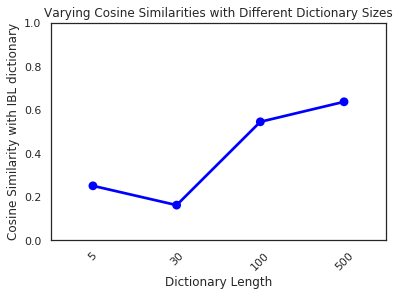

In [75]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Blue', data=dat_i)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(0,1)
plt.title("Varying Cosine Similarities with Different Dictionary Sizes")
ax.set(xlabel='Dictionary Length', ylabel='Cosine Similarity with IBL dictionary')
plt.show()

## Histograms

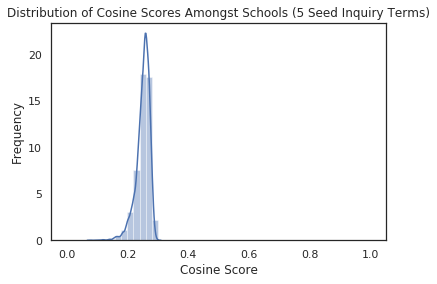

In [130]:
sns.set_style("white")
sns.distplot(df_infersent.infersent_inqseed_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (5 Seed Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

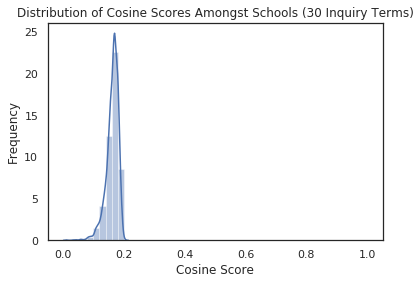

In [131]:
sns.set_style("white")
sns.distplot(df_infersent.infersent_inq30_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (30 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

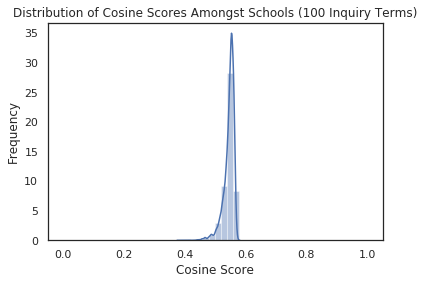

In [132]:
sns.set_style("white")
sns.distplot(df_infersent.infersent_inq100_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (100 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

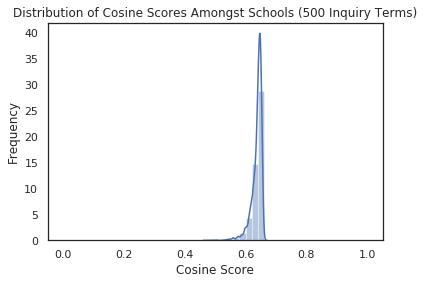

In [133]:
sns.set_style("white")
sns.distplot(df_infersent.infersent_inq500_cosine, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (500 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

# Word2Vec Model attempt

In [80]:
import time

In [81]:
# Define model file path
wem_path = "../../nowdata/backups/wem_model_train250_nostem.bin"
model_word2vec = gensim.models.KeyedVectors.load_word2vec_format(wem_path, binary=True) # Load word2vec model

/opt/conda/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [82]:
inqseed_cosine = []
start = time.clock()
for i in range(len(df_nn.NCESSCH)):
    #print(i)
    cosine_value = doc_words_cosine(model_word2vec, df_nn.iloc[i,].NCESSCH, inqseed_filtered, 'word2vec')
    inqseed_cosine.append(cosine_value)
print("time taken: ",time.clock() - start, " seconds")

time taken:  409.41378199999997  seconds


In [83]:
inq30_cosine = []
start = time.clock()
for i in range(len(df_nn.NCESSCH)):
    #print(i)
    cosine_value = doc_words_cosine(model_word2vec, df_nn.iloc[i,].NCESSCH, inq30_filtered, 'word2vec')
    inq30_cosine.append(cosine_value)
print("time taken: ",time.clock() - start, " seconds")

time taken:  397.560511  seconds


In [84]:
inq100_cosine = []
start = time.clock()
for i in range(len(df_nn.NCESSCH)):
    #print(i)
    cosine_value = doc_words_cosine(model_word2vec, df_nn.iloc[i,].NCESSCH, inq100_filtered, 'word2vec')
    inq100_cosine.append(cosine_value)
print("time taken: ",time.clock() - start, " seconds")

time taken:  390.2302219999999  seconds


In [85]:
inq500_cosine = []
start = time.clock()
for i in range(len(df_nn.NCESSCH)):
    #print(i)
    cosine_value = doc_words_cosine(model_word2vec, df_nn.iloc[i,].NCESSCH, inq500_filtered, 'word2vec')
    inq500_cosine.append(cosine_value)
print("time taken: ",time.clock() - start, " seconds")

time taken:  405.1441169999998  seconds


In [86]:
df_nn['inqseed_cosine_word2vec'] = inqseed_cosine
df_nn['inq30_cosine_word2vec'] = inq30_cosine
df_nn['inq100_cosine_word2vec'] = inq100_cosine
df_nn['inq500_cosine_word2vec'] = inq500_cosine

In [87]:
#change this if you have more dictionary sizes
ls_lens_word2vec = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_word2vec = [df_nn.inqseed_cosine_word2vec.mean(), df_nn.inq30_cosine_word2vec.mean(),
           df_nn.inq100_cosine_word2vec.mean(), df_nn.inq500_cosine_word2vec.mean()]

In [88]:
d_w = {'Strength': ls_avgs_word2vec, 'Words':ls_lens_word2vec}
dat_w = pd.DataFrame(data=d_w)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

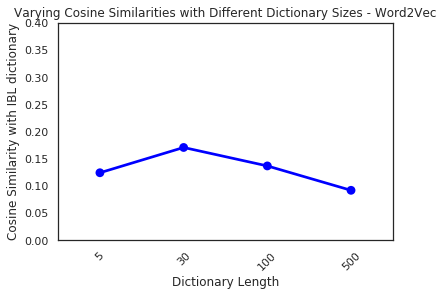

In [89]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Blue', data=dat_w)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(0,0.4)
plt.title("Varying Cosine Similarities with Different Dictionary Sizes - Word2Vec")
ax.set(xlabel='Dictionary Length', ylabel='Cosine Similarity with IBL dictionary')
plt.show()

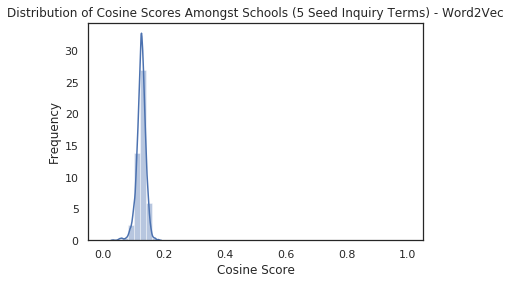

In [134]:
sns.set_style("white")
sns.distplot(df_nn.inqseed_cosine_word2vec, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (5 Seed Inquiry Terms) - Word2Vec")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

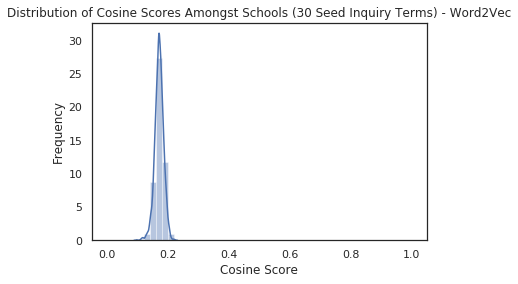

In [135]:
sns.set_style("white")
sns.distplot(df_nn.inq30_cosine_word2vec, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (30 Seed Inquiry Terms) - Word2Vec")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

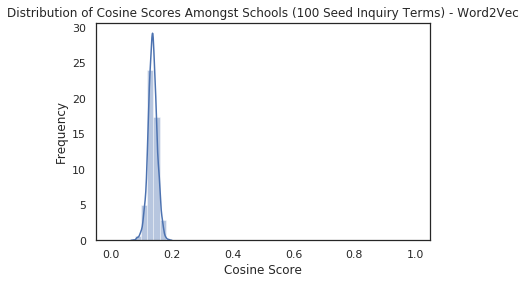

In [136]:
sns.set_style("white")
sns.distplot(df_nn.inq100_cosine_word2vec, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (100 Seed Inquiry Terms) - Word2Vec")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

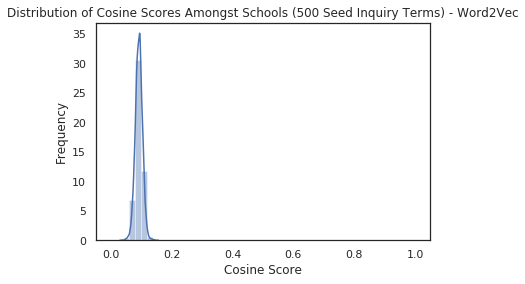

In [137]:
sns.set_style("white")
sns.distplot(df_nn.inq500_cosine_word2vec, bins=50, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (500 Seed Inquiry Terms) - Word2Vec")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

## Summarizing results

Cosine plots for word2vec, doc2vec, raw counts, and infersent:

Correlation plots between infersent and doc2vec, between word2vec and doc2vec

## Correlation Plots

### Between Doc2Vec and Raw Count

In [103]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_cosine'].corr(df_nn['inqseed_raw']), df_nn['inq30_cosine'].corr(df_nn['inq30_raw']),
           df_nn['inq100_cosine'].corr(df_nn['inq100_raw']), df_nn['inq500_cosine'].corr(df_nn['inq500_raw'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

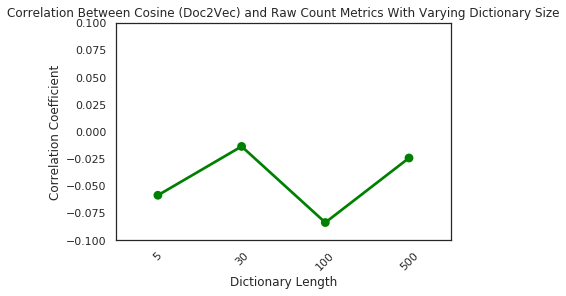

In [105]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.1,0.1)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine (Doc2Vec) and Raw Count Metrics With Varying Dictionary Size")
plt.show()

### Between Word2vec and Raw Count

In [113]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_raw'].corr(df_nn['inqseed_cosine_word2vec']), 
                df_nn['inq30_raw'].corr(df_nn['inq30_cosine_word2vec']),
                df_nn['inq100_raw'].corr(df_nn['inq100_cosine_word2vec']), 
                df_nn['inq500_raw'].corr(df_nn['inq500_cosine_word2vec'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

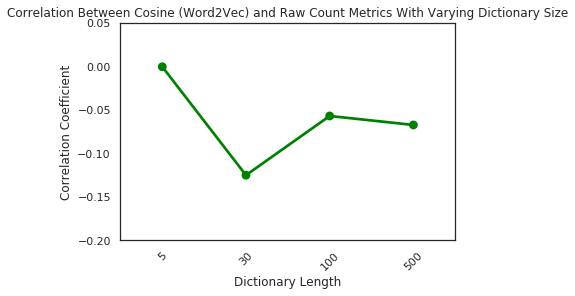

In [116]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.2,0.05)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine (Word2Vec) and Raw Count Metrics With Varying Dictionary Size")
plt.show()

### Between InferSent and Raw Count

In [117]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_raw'].corr(df_nn['infersent_inqseed_cosine']), 
                df_nn['inq30_raw'].corr(df_nn['infersent_inq30_cosine']),
                df_nn['inq100_raw'].corr(df_nn['infersent_inq100_cosine']), 
                df_nn['inq500_raw'].corr(df_nn['infersent_inq500_cosine'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

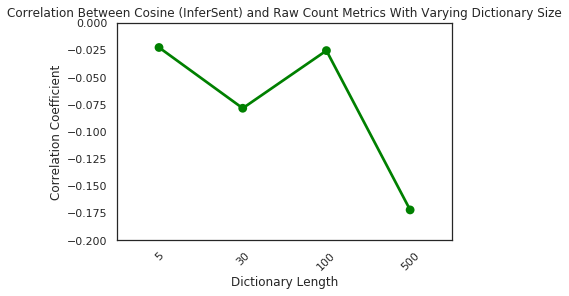

In [119]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.2,0)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine (InferSent) and Raw Count Metrics With Varying Dictionary Size")
plt.show()

### Between Word2vec and doc2vec

In [120]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_cosine'].corr(df_nn['inqseed_cosine_word2vec']), 
                df_nn['inq30_cosine'].corr(df_nn['inq30_cosine_word2vec']),
                df_nn['inq100_cosine'].corr(df_nn['inq100_cosine_word2vec']), 
                df_nn['inq500_cosine'].corr(df_nn['inq500_cosine_word2vec'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

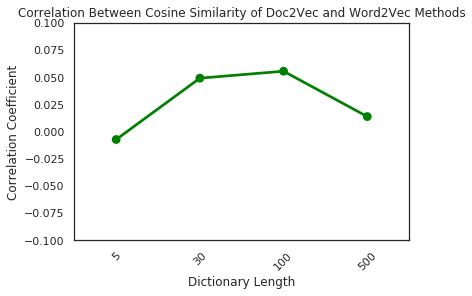

In [121]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.1,0.1)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine Similarity of Doc2Vec and Word2Vec Methods")
plt.show()

## Between InferSent and Doc2Vec

In [122]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_cosine'].corr(df_nn['infersent_inqseed_cosine']), 
                df_nn['inq30_cosine'].corr(df_nn['infersent_inq30_cosine']),
                df_nn['inq100_cosine'].corr(df_nn['infersent_inq100_cosine']), 
                df_nn['inq500_cosine'].corr(df_nn['infersent_inq500_cosine'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

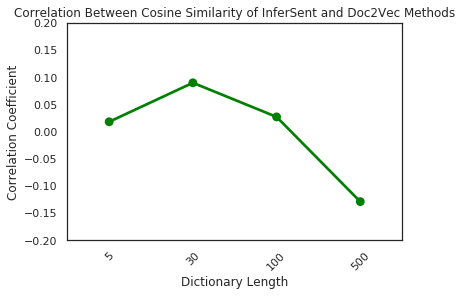

In [123]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.2,0.2)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine Similarity of InferSent and Doc2Vec Methods")
plt.show()

## Between InferSent and Word2Vec

In [124]:
#change this if you have more dictionary sizes
ls_lens_corr = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs_corr = [df_nn['inqseed_cosine_word2vec'].corr(df_nn['infersent_inqseed_cosine']), 
                df_nn['inq30_cosine_word2vec'].corr(df_nn['infersent_inq30_cosine']),
                df_nn['inq100_cosine_word2vec'].corr(df_nn['infersent_inq100_cosine']), 
                df_nn['inq500_cosine_word2vec'].corr(df_nn['infersent_inq500_cosine'])]
d_c = {'Strength': ls_avgs_corr, 'Words':ls_lens_corr}
dat_c = pd.DataFrame(data=d_c)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

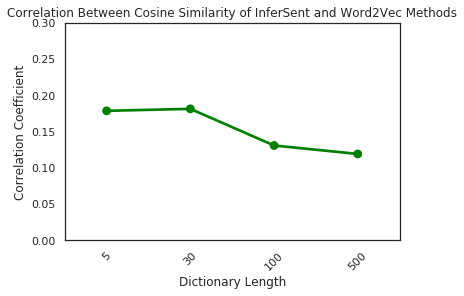

In [125]:
sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", color='Green', data=dat_c)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(0,0.3)
ax.set(xlabel='Dictionary Length', ylabel='Correlation Coefficient')
plt.title("Correlation Between Cosine Similarity of InferSent and Word2Vec Methods")
plt.show()

# Correlation Plot broken by years

In [267]:
text = pd.read_csv("../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_2020_oct17_2000.csv") 

In [268]:
text['article_id'] = text.filename.apply(lambda x: x[24:-4])

In [269]:
text.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                            filename  \
0  ../../../jstor_data/ocr/journal-article-10.230...   
1  ../../../jstor_data/ocr/journal-article-10.230...   
2  ../../../jstor_data/ocr/journal-article-10.230...   
3  ../../../jstor_data/ocr/journal-article-10.230...   
4  ../../../jstor_data/ocr/journal-article-10.230...   

                                                text   edited_filename  \
0  research note church membership netherlands ro...   10.2307_1387034   
1  polish i3o oo sociological review issn communi...  10.2307_41274754   
2  article jjdlbsj grapliy compassionate egalitar...  10.2307_24467156   
3  reply allison more comparing regression coeffi...   10.2307_2782279   
4  determinants spousal interaction marital struc...    10.2307_351656   

   relational_word2vec_cosine  demographic_word2vec_cosine  \
0                    0.564102                     0.571240   
1                    0.637913                     0.603306   
2                    0.600966                     0.560712   
3                    0.528776                     0.526544   
4                    0.622559                     0.557915   

   culture_word2vec_cosine                        article_id  
0                 0.541906   journal-article-10.2307_1387034  
1                 0.683480  journal-article-10.2307_41274754  
2                 0.665908  journal-article-10.2307_24467156  
3                 0.461285   journal-article-10.2307_2782279  
4                 0.578261    journal-article-10.2307_351656

In [270]:
text_2 = pd.read_csv('../../../models_storage/word_embeddings_data/counts_and_subject.csv')

In [271]:
import pandas as pd
test = pd.read_csv('../../../models_storage/word_embeddings_data/filtered_index.csv')

In [272]:
test.head()

journal-article-10.2307_2065002
0   journal-article-10.2307_3380821
1   journal-article-10.2307_2095822
2   journal-article-10.2307_2631839
3  journal-article-10.2307_40836133
4   journal-article-10.2307_2579666

In [273]:
text = text.merge(text_2, how = 'inner', on = 'article_id')

In [274]:
def year_transform(x):
    if len(str(x)) == 5:
        return int(str(x)[:4])
    else:
        return int(str(x))

In [275]:
text['year'] = text['year'].apply(lambda x: year_transform(x))

In [276]:
text = text[text['year']//10 == 200]

In [277]:
text['culture_word2vec_cosine'] = text['culture_word2vec_cosine'].astype('float')
text['demographic_word2vec_cosine'] = text['demographic_word2vec_cosine'].astype('float')
text['relational_word2vec_cosine'] = text['relational_word2vec_cosine'].astype('float')

In [278]:
text['culture_ngram_count_new'] = text['culture_ngram_count']/text['word_count']
text['demographic_ngram_count_new'] = text['demographic_ngram_count']/text['word_count']
text['relational_ngram_count_new'] = text['relational_ngram_count']/text['word_count']

text['culture_ngram_count_new'] = (text['culture_ngram_count_new'] - text['culture_ngram_count_new'].min())/(text['culture_ngram_count_new'].max() - text['culture_ngram_count_new'].min())
text['demographic_ngram_count_new'] = (text['demographic_ngram_count_new'] - text['demographic_ngram_count_new'].min())/(text['demographic_ngram_count_new'].max() - text['demographic_ngram_count_new'].min())
text['relational_ngram_count_new'] = (text['relational_ngram_count_new']  - 
                                      text['relational_ngram_count_new'] .min())/(text['relational_ngram_count_new'] .max() - text['relational_ngram_count_new'] .min())

In [279]:
text_soc = text[text.primary_subject == 'Sociology']
text_management = text[text.primary_subject != 'Sociology']

In [280]:
text_soc.head()

Unnamed: 0  Unnamed: 0.1  \
1            1             1   
6            6             6   
10          10            10   
14          14            14   
15          15            15   

                                             filename  \
1   ../../../jstor_data/ocr/journal-article-10.230...   
6   ../../../jstor_data/ocr/journal-article-10.230...   
10  ../../../jstor_data/ocr/journal-article-10.230...   
14  ../../../jstor_data/ocr/journal-article-10.230...   
15  ../../../jstor_data/ocr/journal-article-10.152...   

                                                 text  \
1   polish i3o oo sociological review issn communi...   
6   andrew christensen university california los a...   
10  guess who coming town white supremacy ethnic c...   
14  friends court examining influence amicus curia...   
15  plain text page sequence notice contributors s...   

            edited_filename  relational_word2vec_cosine  \
1          10.2307_41274754                    0.637913   
6           10.2307_4122891                    0.646681   
10         10.2307_20832073                    0.574327   
14          10.2307_1555091                    0.598561   
15  10.1525_si.2009.32.4.bm                    0.593824   

    demographic_word2vec_cosine  culture_word2vec_cosine  \
1                      0.603306                 0.683480   
6                      0.581810                 0.603454   
10                     0.595565                 0.621693   
14                     0.557321                 0.622489   
15                     0.576974                 0.608734   

                                 article_id  culture_ngram_count  ...  \
1          journal-article-10.2307_41274754                    0  ...   
6           journal-article-10.2307_4122891                   10  ...   
10         journal-article-10.2307_20832073                   26  ...   
14          journal-article-10.2307_1555091                   40  ...   
15  journal-article-10.1525_si.2009.32.4.bm                    2  ...   

    demographic_ngram_count.1  word_count  cultural_author_count  \
1                           1        1238                      0   
6                           9        7866                      0   
10                        175        8570                      0   
14                          3        8945                      0   
15                          0         894                      0   

    demographic_author_count  relational_author_count  primary_subject  year  \
1                          0                        0        Sociology  2000   
6                          0                        0        Sociology  2003   
10                         0                        0        Sociology  2000   
14                         0                        0        Sociology  2002   
15                         0                        0        Sociology  2009   

    culture_ngram_count_new  demographic_ngram_count_new  \
1                  0.000000                     0.012025   
6                  0.019995                     0.026496   
10                 0.047717                     0.310936   
14                 0.070333                     0.018307   
15                 0.035186                     0.000000   

   relational_ngram_count_new  
1                    0.042182  
6                    0.033194  
10                   0.070685  
14                   0.199661  
15                   0.163557  

[5 rows x 24 columns]

In [281]:
text_soc['culture_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine'])

1.0

In [282]:
df_emb = pd.DataFrame()

ls_emb = []
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['culture_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['culture_word2vec'] = ls_emb

In [283]:
ls_emb = []
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['demographic_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['demographic_word2vec'] = ls_emb

In [284]:
ls_emb = []
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['relational_word2vec_cosine'].corr(text_soc['relational_ngram_count_new']))
df_emb['relational_word2vec'] = ls_emb

In [285]:
ls_emb = []
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['culture_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['culture_count'] = ls_emb

In [286]:
ls_emb = []
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['demographic_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['demographic_count'] = ls_emb

In [287]:
ls_emb = []
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['culture_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['demographic_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['relational_word2vec_cosine']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['culture_ngram_count_new']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['demographic_ngram_count_new']))
ls_emb.append(text_soc['relational_ngram_count_new'].corr(text_soc['relational_ngram_count_new']))
df_emb['relational_count'] = ls_emb

In [288]:
df_emb.index = ['culture_word2vec', 'demographic_word2vec', 'relational_word2vec', 'culture_count', 
                'demographic_count', 'relational_count']

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

<Figure size 432x288 with 0 Axes>

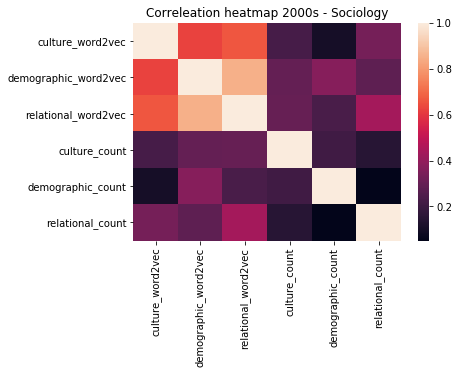

In [290]:
ax = sns.heatmap(df_emb)
ax.set_title('Correleation heatmap 2000s - Sociology')

fig.set_size_inches(8,20)
title = "corr_2000_sociology"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 8), bbox_inches="tight")
plt.show()

In [291]:
df_emb = pd.DataFrame()

ls_emb = []
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['culture_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['culture_word2vec'] = ls_emb

In [292]:
ls_emb = []
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['demographic_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['demographic_word2vec'] = ls_emb

In [293]:
ls_emb = []
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['relational_word2vec_cosine'].corr(text_management['relational_ngram_count_new']))
df_emb['relational_word2vec'] = ls_emb

In [294]:
ls_emb = []
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['culture_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['culture_count'] = ls_emb

In [295]:
ls_emb = []
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['demographic_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['demographic_count'] = ls_emb

In [296]:
ls_emb = []
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['culture_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['demographic_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['relational_word2vec_cosine']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['culture_ngram_count_new']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['demographic_ngram_count_new']))
ls_emb.append(text_management['relational_ngram_count_new'].corr(text_management['relational_ngram_count_new']))
df_emb['relational_count'] = ls_emb

In [297]:
df_emb.index = ['culture_word2vec', 'demographic_word2vec', 'relational_word2vec', 'culture_count', 
                'demographic_count', 'relational_count']

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

<Figure size 432x288 with 0 Axes>

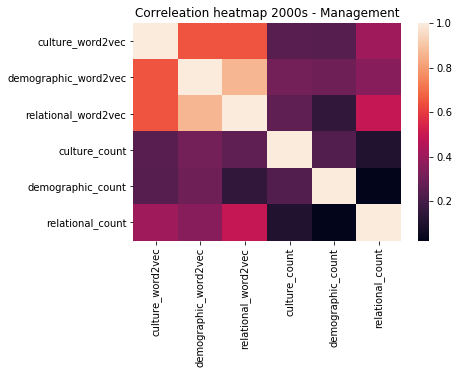

In [299]:
ax = sns.heatmap(df_emb)
ax.set_title('Correleation heatmap 2000s - Management')

fig.set_size_inches(8,8)
title = "corr_2000_management"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 8), bbox_inches="tight")
plt.show()